In [1]:
import pandas as pd
import geopandas as gpd
import sys
sys.path.append('../lib/')
import matplotlib.pyplot as plt
import math


import workers as workers
import sweden as sweden

In [2]:
result = pd.read_csv('../results/flows_1km_10km_sweden.csv')
grids = gpd.read_file("../results/grids_sweden/grids_1km_density_deso_with_10km_upper_grids.shp")

In [3]:
result.head()

,ozone,dzone,d_ij,D_ij_data,D_ij_sim,v_ij,grid_type
0,18,18,0.000000,0.000000,0.000000,0.000000,1
1,18,8,2.236068,1.639817,1.457747,43.436840,1
2,18,20,2.000000,1.648406,1.484936,54.296050,1
3,18,19,1.000000,1.960368,1.740077,217.184198,1
4,18,1,4.472136,1.534267,1.338410,10.859210,1


In [4]:
gdf_zones = gpd.read_file("../dbs/sweden/zones/DeSO/DeSO_2018_v2.shp")

In [5]:
grids.head()

,zone,deso,density,upper_deso,upper_dens,upper_zone,upper_xcoo,upper_ycoo,geometry
0,18,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((660000.000 6596000.000, 660000.000 6..."
1,8,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((659000.000 6598000.000, 659000.000 6..."
2,20,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((660000.000 6598000.000, 660000.000 6..."
3,19,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((660000.000 6597000.000, 660000.000 6..."
4,1,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((658000.000 6600000.000, 658000.000 6..."


In [6]:
agg_level=4

In [7]:
grids_dict = dict(zip(grids.zone, grids.deso))

In [8]:
result.loc[:,'ozone_deso'] = result.loc[:, 'ozone'].map(grids_dict).apply(lambda x: x[:agg_level])

In [9]:
result.loc[:,'dzone_deso'] = result.loc[:, 'dzone'].map(grids_dict).apply(lambda x: x[:agg_level])

In [10]:
result

,ozone,dzone,d_ij,D_ij_data,D_ij_sim,v_ij,grid_type,ozone_deso,dzone_deso
0,18,18,0.000000,0.000000,0.000000,0.000000,1,0114,0114
1,18,8,2.236068,1.639817,1.457747,43.436840,1,0114,0114
2,18,20,2.000000,1.648406,1.484936,54.296050,1,0114,0114
3,18,19,1.000000,1.960368,1.740077,217.184198,1,0114,0114
4,18,1,4.472136,1.534267,1.338410,10.859210,1,0114,0114
...,...,...,...,...,...,...,...,...,...
72778292,5028,5024,14.142136,1.404068,1.234242,88.768872,10,0136,0136
72778293,5028,5025,10.000000,1.434981,1.263294,177.537744,10,0136,0136
72778294,5028,5026,14.142136,1.404068,1.234242,88.768872,10,0136,0136
72778295,5028,5027,10.000000,1.434981,1.263294,177.537744,10,0136,0136


In [11]:
result_1 = result.groupby(['ozone_deso', 'dzone_deso'])[ 'v_ij'].sum().reset_index()

In [12]:
result_1

,ozone_deso,dzone_deso,v_ij
0,0114,0114,1.328431e+08
1,0114,0115,2.557794e+07
2,0114,0117,4.094059e+06
3,0114,0120,1.368843e+07
4,0114,0123,4.911734e+05
...,...,...,...
2117,2583,2518,5.234224e+03
2118,2583,2583,9.534196e+05
2119,2584,2521,4.155623e+03
2120,2584,2523,6.283611e+03


In [15]:
flows_gt = pd.DataFrame(pd.read_csv('../results/flows_gt.csv', converters={u'ozone_deso':str, u'dzone_deso':str, u'v_ij_gt':float}))

In [16]:
flows_gt

,ozone_deso,dzone_deso,v_ij_gt
0,0114,0114,5.144816e+07
1,0114,0115,2.166490e+05
2,0114,0117,5.804400e+05
3,0114,0123,5.046360e+05
4,0114,0125,2.617775e+04
...,...,...,...
3758,2584,2482,5.386938e+05
3759,2584,2523,1.110603e+06
3760,2584,2582,4.542566e+05
3761,2584,2583,5.619040e+05


In [19]:
grids_big = gpd.read_file("../dbs/sweden/zones/Deso/DeSO_2018_v2.shp")

In [20]:
grids_big.head()

,id,objectid,uuid,deso,befolkning,version,geometry
0,1.0,1,{D9661502-EE24-45AE-A1F7-C1C80F463556},0114A0010,790,2018_v2,"POLYGON ((661116.252 6606615.603, 661171.409 6..."
1,2.0,2,{5EA47309-A001-4E2A-843E-02EC8F544E4C},0114C1010,1608,2018_v2,"POLYGON ((666960.066 6598800.393, 666971.371 6..."
2,3.0,3,{0DA292ED-A306-4D7E-A392-BD063A3093E1},0114C1020,1610,2018_v2,"POLYGON ((667034.814 6600076.634, 667032.984 6..."
3,4.0,4,{18583EFC-ECC1-4D27-B520-DA294F5658FD},0114C1030,2365,2018_v2,"POLYGON ((667095.512 6599103.521, 667095.009 6..."
4,5.0,5,{6574A7B3-AD12-4A81-8EAC-773B976B72BC},0114C1040,2346,2018_v2,"POLYGON ((664610.264 6600922.821, 664638.910 6..."


In [21]:
grids_big.loc[:,'upper_deso'] = grids_big.loc[:, 'deso'].apply(lambda x: x[0:4])

In [22]:
grids_big_use = grids_big.dissolve(by='upper_deso', aggfunc='sum')

In [23]:
grids_big_use

,geometry,id,objectid,befolkning
upper_deso,,,,
0114,"POLYGON ((664663.631 6597477.443, 664653.118 6...",276.0,276,46786
0115,"POLYGON ((675775.690 6600118.275, 675631.701 6...",627.0,627,34090
0117,"POLYGON ((686822.565 6592520.451, 686041.700 6...",1242.0,1242,45574
0120,"POLYGON ((697939.414 6569646.878, 697846.459 6...",1860.0,1860,45000
0123,"POLYGON ((659903.355 6587815.099, 659877.356 6...",4380.0,4380,79990
...,...,...,...,...
2580,"POLYGON ((800857.314 7287900.809, 799591.866 7...",271147.0,271147,78105
2581,"POLYGON ((793300.542 7241240.406, 793295.100 7...",166082.0,166082,42281
2582,"POLYGON ((811093.111 7304243.942, 811106.486 7...",107181.0,107181,28080


In [24]:
upper_deso_name = list(grids_big_use.index.array)

In [25]:
dis = dict()
for i in upper_deso_name:
    element = dict()
    for j in upper_deso_name:
        delta_x = grids_big_use.geometry.loc[i].centroid.x -  grids_big_use.geometry.loc[j].centroid.x
        delta_y = grids_big_use.geometry.loc[i].centroid.y -  grids_big_use.geometry.loc[j].centroid.y
        distance = delta_x * delta_x + delta_y * delta_y
        element[j] = pow(distance, 0.5)
    dis[i] = element

In [26]:
flows_gt.loc[:,'distance'] = 0

In [27]:
flows_gt.head()

,ozone_deso,dzone_deso,v_ij_gt,distance
0,0114,0114,5.144816e+07,0
1,0114,0115,2.166490e+05,0
2,0114,0117,5.804400e+05,0
3,0114,0123,5.046360e+05,0
4,0114,0125,2.617775e+04,0


In [32]:
for i in flows_gt.index:
    flows_gt.loc[i, 'distance'] = dis[flows_gt.loc[i, 'ozone_deso']][flows_gt.loc[i, 'dzone_deso']]

In [33]:
flows_gt

,ozone_deso,dzone_deso,v_ij_gt,distance
0,0114,0114,5.144816e+07,0.000000
1,0114,0115,2.166490e+05,18159.440980
2,0114,0117,5.804400e+05,36988.166911
3,0114,0123,5.046360e+05,10968.190328
4,0114,0125,2.617775e+04,23796.622868
...,...,...,...,...
3758,2584,2482,5.386938e+05,374900.334599
3759,2584,2523,1.110603e+06,100904.279948
3760,2584,2582,4.542566e+05,236077.978878
3761,2584,2583,5.619040e+05,291875.304148


In [50]:
result_1.head()

,ozone_deso,dzone_deso,v_ij,distance
0,0114,0114,1.328431e+08,0.000000
1,0114,0115,2.557794e+07,18159.440980
2,0114,0117,4.094059e+06,36988.166911
3,0114,0120,1.368843e+07,56218.609477
4,0114,0123,4.911734e+05,10968.190328


In [93]:
flows_comparison = flows_gt.loc[flows_gt['v_ij_gt'] != 0, :].merge(result_1, on=['ozone_deso', 'dzone_deso','distance'], how='inner')

In [94]:
flows_comparison

,ozone_deso,dzone_deso,v_ij_gt,distance,v_ij
0,0114,0114,5.144816e+07,0.000000,1.328431e+08
1,0114,0115,2.166490e+05,18159.440980,2.557794e+07
2,0114,0117,5.804400e+05,36988.166911,4.094059e+06
3,0114,0123,5.046360e+05,10968.190328,4.911734e+05
4,0114,0125,2.617775e+04,23796.622868,9.221300e+05
...,...,...,...,...,...
1407,2582,2582,6.514406e+07,0.000000,2.897994e+06
1408,2583,2518,1.049023e+06,77605.749310,5.234224e+03
1409,2583,2583,1.108990e+07,0.000000,9.534196e+05
1410,2584,2523,1.110603e+06,100904.279948,6.283611e+03


In [34]:
#distance_threshold = list(flows_comparison['distance'].quantile( q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]))

In [95]:
distance_use = flows_comparison.distance

In [97]:
distance_use = sorted(distance_use)

In [98]:
distance_use

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [99]:
distance_use_i = [] 
for i in distance_use:
    if i != 0:
        distance_use_i.append(i)



In [100]:
len(distance_use_i)

1122

In [101]:
distance_threshold = [0]
for i in range(1, 7):
    #print(i * 125 - 1)
    distance_threshold.append(distance_use_i[i * 125 - 1])

for i in range(1, 4):
    #print(749 + 124 * i)
    distance_threshold.append(distance_use_i[749 + 124 * i])

In [102]:
distance_threshold

[0,
 15266.047732450572,
 19836.38380577896,
 23519.99663427648,
 27554.233009880358,
 31145.840374806543,
 35432.81847572296,
 41563.17827696145,
 50837.00101722975,
 142528.29995475247]

In [103]:
flows_comparison.loc[:,'level'] = 0

In [105]:
def get_level(dp, d):
    level_result = 1
    for ddpp in dp:
        if d > ddpp:
            level_result = level_result + 1
        else:
            break
    return level_result

In [106]:
for i in flows_comparison.index:
    flows_comparison.loc[i, 'level'] = get_level(  distance_threshold, flows_comparison.loc[i, 'distance'])

In [107]:
flows_comparison

,ozone_deso,dzone_deso,v_ij_gt,distance,v_ij,level
0,0114,0114,5.144816e+07,0.000000,1.328431e+08,1
1,0114,0115,2.166490e+05,18159.440980,2.557794e+07,3
2,0114,0117,5.804400e+05,36988.166911,4.094059e+06,8
3,0114,0123,5.046360e+05,10968.190328,4.911734e+05,2
4,0114,0125,2.617775e+04,23796.622868,9.221300e+05,5
...,...,...,...,...,...,...
1407,2582,2582,6.514406e+07,0.000000,2.897994e+06,1
1408,2583,2518,1.049023e+06,77605.749310,5.234224e+03,10
1409,2583,2583,1.108990e+07,0.000000,9.534196e+05,1
1410,2584,2523,1.110603e+06,100904.279948,6.283611e+03,10


In [108]:
number = []
for i in range(1, 11):
    level_percent = i
    flows_comparison_level = flows_comparison[flows_comparison['level'] == i]
    number.append(len(flows_comparison_level))


In [109]:
number

[290, 125, 126, 124, 126, 125, 125, 123, 125, 123]

In [110]:
sum(number)

1412

In [111]:

flows_comparison.loc[:, 'v_ij_gt'] = flows_comparison.loc[:, 'v_ij_gt'] / flows_comparison.loc[:, 'v_ij_gt'].sum()
flows_comparison.loc[:, 'v_ij'] = flows_comparison.loc[:, 'v_ij'] / flows_comparison.loc[:, 'v_ij'].sum()
flows_comparison.head()

,ozone_deso,dzone_deso,v_ij_gt,distance,v_ij,level
0,0114,0114,0.002559,0.000000,0.061782,1
1,0114,0115,0.000011,18159.440980,0.011896,3
2,0114,0117,0.000029,36988.166911,0.001904,8
3,0114,0123,0.000025,10968.190328,0.000228,2
4,0114,0125,0.000001,23796.622868,0.000429,5


In [112]:
level_percent = 2
flows_comparison_level = flows_comparison[flows_comparison['level'] == level_percent]

In [114]:
flows_comparison_level

,ozone_deso,dzone_deso,v_ij_gt,distance,v_ij,level
3,0114,0123,0.000025,10968.190328,0.000228,2
5,0114,0139,0.000004,14355.346294,0.000019,2
6,0114,0160,0.000066,11281.065839,0.000060,2
8,0114,0163,0.000354,7952.327813,0.000482,2
10,0114,0191,0.000185,14167.681526,0.000099,2
...,...,...,...,...,...,...
1135,1881,1861,0.000080,14728.967372,0.000079,2
1167,1962,1982,0.000159,15126.006349,0.000050,2
1182,1982,1962,0.000159,15126.006349,0.000050,2
1258,2104,2181,0.000015,14192.282753,0.000020,2


(1e-07, 0.1)

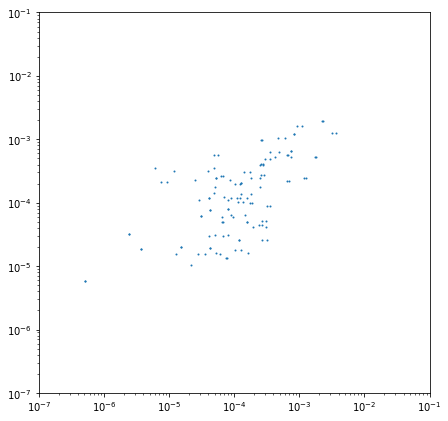

In [115]:
plt.figure(figsize=(7, 7))
plt.scatter(flows_comparison_level.loc[:, 'v_ij_gt'], flows_comparison_level.loc[:, 'v_ij'], s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0000001, 0.1)
plt.ylim(0.0000001, 0.1)

In [116]:
flows_comparison_level.loc[:, 'v_ij_min'] = flows_comparison_level.apply(lambda row: min(row['v_ij_gt'], row['v_ij']), axis=1)
SSI = 2 * flows_comparison_level.loc[:, 'v_ij_min'].sum() / \
      (flows_comparison_level.loc[:, 'v_ij_gt'].sum() + flows_comparison_level.loc[:, 'v_ij'].sum())
SSI

C:\Users\laptop\AppData\Local\Temp\ipykernel_10076\1389571067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flows_comparison_level.loc[:, 'v_ij_min'] = flows_comparison_level.apply(lambda row: min(row['v_ij_gt'], row['v_ij']), axis=1)


0.6574738911768592

In [119]:
result_vij_SSI = []
for level_percent in range(1, 11):
    flows_comparison_level = flows_comparison[flows_comparison['level'] == level_percent]
    
    flows_comparison_level.loc[:, 'v_ij_min'] = flows_comparison_level.apply(lambda row: min(row['v_ij_gt'], row['v_ij']), axis=1)
    SSI = 2 * flows_comparison_level.loc[:, 'v_ij_min'].sum() / \
      (flows_comparison_level.loc[:, 'v_ij_gt'].sum() + flows_comparison_level.loc[:, 'v_ij'].sum())
    result_vij_SSI.append(SSI)

C:\Users\laptop\AppData\Local\Temp\ipykernel_10076\1135398928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flows_comparison_level.loc[:, 'v_ij_min'] = flows_comparison_level.apply(lambda row: min(row['v_ij_gt'], row['v_ij']), axis=1)
C:\Users\laptop\AppData\Local\Temp\ipykernel_10076\1135398928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flows_comparison_level.loc[:, 'v_ij_min'] = flows_comparison_level.apply(lambda row: min(row['v_ij_gt'], row['v_ij']), axis=1)
C:\Users\laptop\AppData\Local\

In [120]:
result_vij_SSI

[0.5863549657773991,
 0.6574738911768592,
 0.34021055497684244,
 0.25720851249644955,
 0.2972294056402418,
 0.3215590255872689,
 0.28563493472722584,
 0.16827443915051737,
 0.10879746532757398,
 0.12421896587557921]

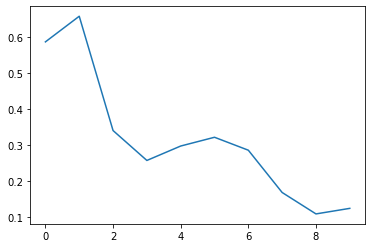

In [122]:
x = list(range(1, 10))
plt.plot(result_vij_SSI)